In [2]:
from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Audio, display
import os
from python_speech_features import mfcc, fbank, logfbank
import librosa

In [33]:
import os
import sys
module_path = os.path.abspath('../src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
import sound_processing as sp
from sound_chain import SoundChain
from sound_reader import SimpleWavFileReader
from data_loader import load_train_data, get_silence, sampling, train_generator
from consts import LABELS, L, id2name

/home/ilya/Documents/kaggle_speech_recognition/src


In [4]:
params = {
    'audio_path': '/home/ilya/Data/speech/train/audio/*/*wav',
    'validation_list_path': '/home/ilya/Data/speech/train/validation_list.txt',
}

In [22]:
train_data, validate_data = load_train_data(params['audio_path'], params['validation_list_path'])

There are 57929 train and 6798 validate samples


In [26]:
wav_reader = SimpleWavFileReader(L)
silence_data = get_silence(train_data, wav_reader)

train_sound_chain = SoundChain(
    SimpleWavFileReader(L),
    sp.AdjustLenWavProcessor(silence_data, L, L),
#     sp.AddNoiseWavProcessor(silence_data, L, L, 30),
#     sp.ShiftWavProcessor(silence_data, L, L),
    sp.EmphasisWavProcessor(silence_data, L, L, 0.97),
    sp.NormalizeWavProcessor(silence_data, L, L),
    sp.ReshapeWavProcessor(silence_data, L, L),
)

In [27]:
this_train = train_data.groupby('label_id').apply(sampling(2))

/home/ilya/Data/speech/train/audio/no/b06c19b0_nohash_1.wav


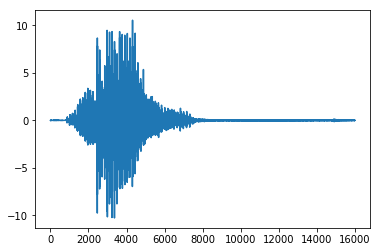

In [28]:
f = this_train.wav_file.values[2]
print(f)
wav = train_sound_chain.run(f)
plt.plot(wav)
Audio(wav[:,0]-0.5, rate=L)

In [12]:
train_df, valid_df = load_train_data(params['audio_path'], params['validation_list_path'])
wav_reader = SimpleWavFileReader(L)
silence_data = get_silence(train_df, wav_reader)
train_sound_chain = SoundChain(
    SimpleWavFileReader(L),
    sp.AdjustLenWavProcessor(silence_data, L, L),
    sp.EmphasisWavProcessor(silence_data, L, L, 0.97),
    sp.NormalizeWavProcessor(silence_data, L, L),
    sp.ReshapeWavProcessor(silence_data, L, L),
)
n = 1
gen = train_generator(train_df, 64, train_sound_chain, n)
wavs, labels = gen.__next__()

There are 57929 train and 6798 validate samples


In [38]:
labels

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

up


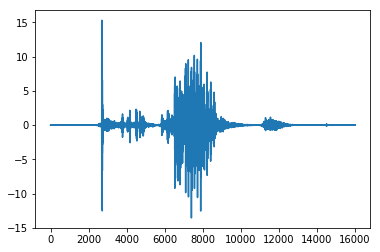

In [44]:
i = 1
print(id2name[np.argmax(labels[i])])
plt.plot(wavs[i][:,0])
Audio(wavs[i][:,0], rate=L)